# Import Library

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

# Load File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("log2.csv")

In [4]:
df

,Level,Date and Time,Source,Event ID,Task Category,Processor ID,Processor Time,User Time
Information,17-03-2023 11:54:28 PM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
Information,18-03-2023 12:22:27 AM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
Information,18-03-2023 12:31:44 AM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
Information,18-03-2023 12:58:56 AM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
Information,18-03-2023 12:54:47 PM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
...,...,...,...,...,...,...,...,...
Information,07-04-2023 02:11:43 PM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
Information,07-04-2023 09:12:55 PM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
Information,07-04-2023 09:30:55 PM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...
Information,07-04-2023 10:02:46 PM,Microsoft Office 16 Alerts,300.0,None,NaN,NaN,NaN,Compositor Type: 0OfficeC2RClientP1: %3P2: %4P...


In [5]:
df["Level"]

Information    17-03-2023 11:54:28 PM
Information    18-03-2023 12:22:27 AM
Information    18-03-2023 12:31:44 AM
Information    18-03-2023 12:58:56 AM
Information    18-03-2023 12:54:47 PM
                        ...          
Information    07-04-2023 02:11:43 PM
Information    07-04-2023 09:12:55 PM
Information    07-04-2023 09:30:55 PM
Information    07-04-2023 10:02:46 PM
Information    07-04-2023 11:06:53 PM
Name: Level, Length: 273, dtype: object

<Axes: >

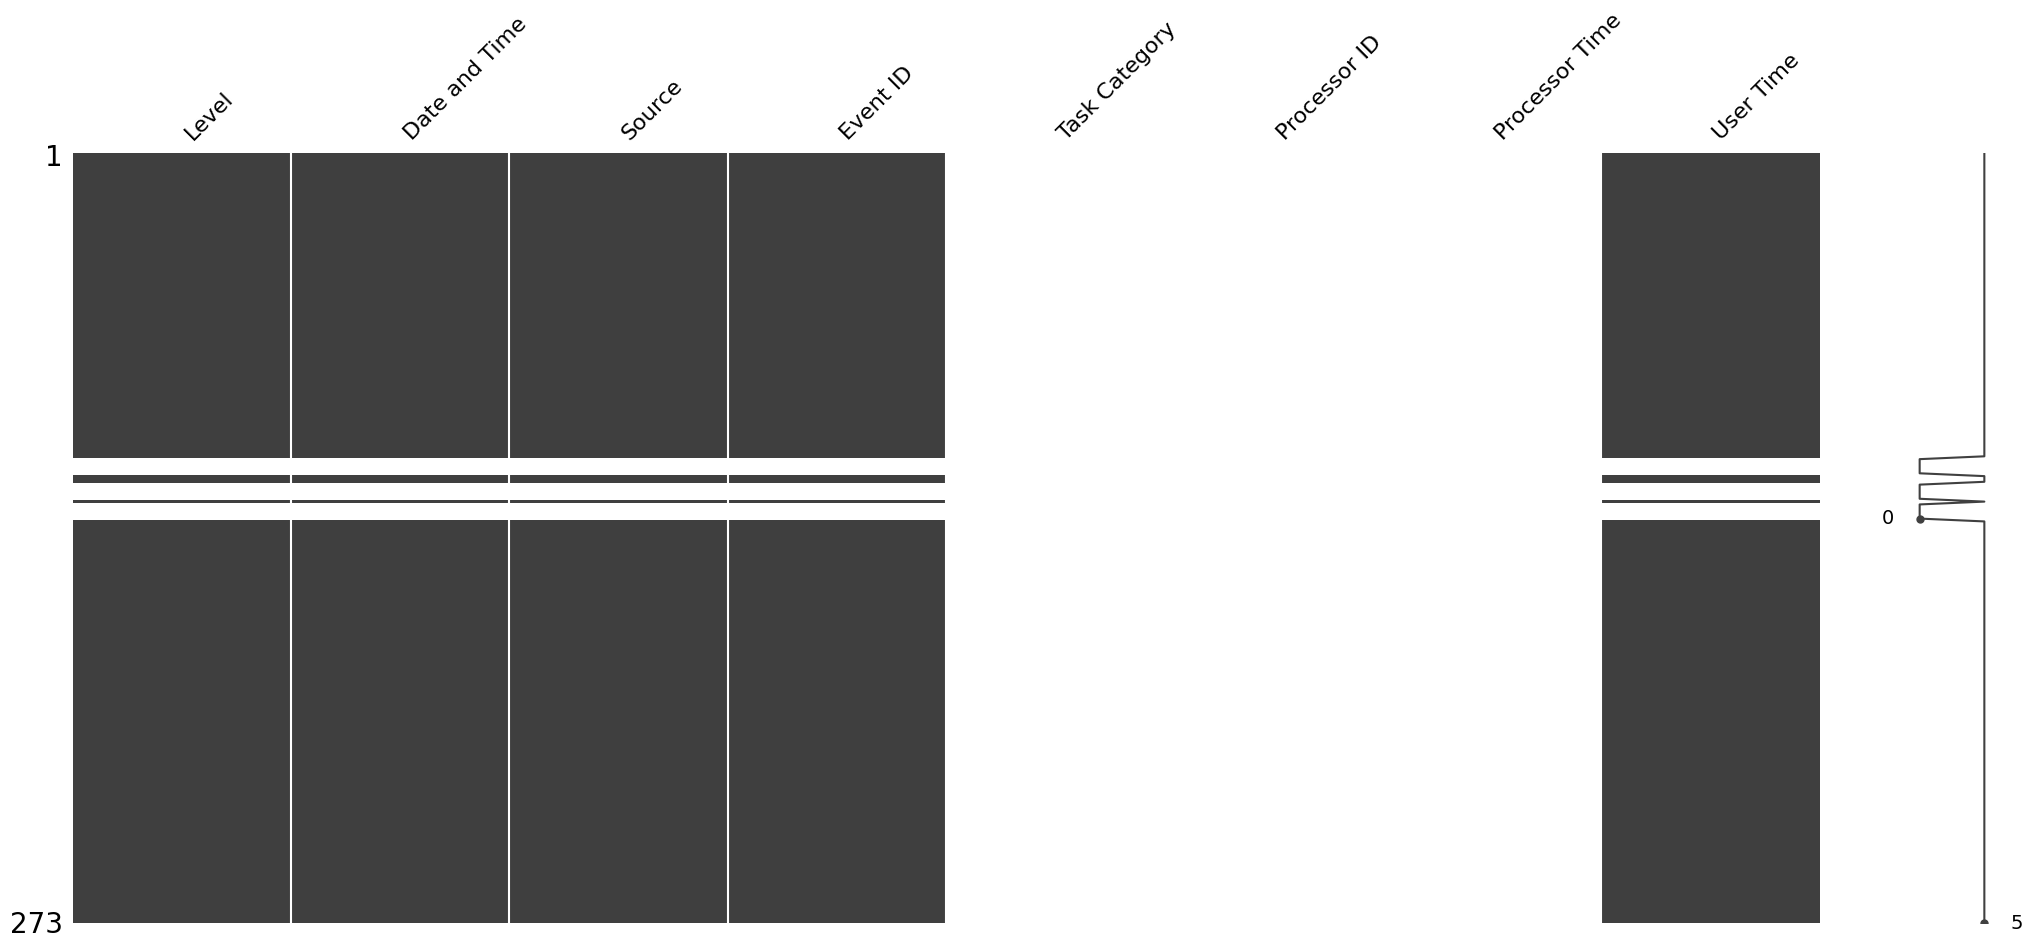

In [6]:
msno.matrix(df)

In [7]:
df=df.fillna(0)

In [8]:
df=df.replace("nan","0")

In [9]:
datatype=df.dtypes

In [10]:
datatype

Level              object
Date and Time      object
Source            float64
Event ID           object
Task Category     float64
Processor ID      float64
Processor Time    float64
User Time          object
dtype: object

In [11]:
df=df.drop(["Processor ID","Processor Time","Task Category"],axis=1)

In [12]:
df["Source"].unique()

array([ 300., 8087.,    0.])

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def resizeplot(l,a,d):
    plt.figure(figsize=(l,a),dpi=d)

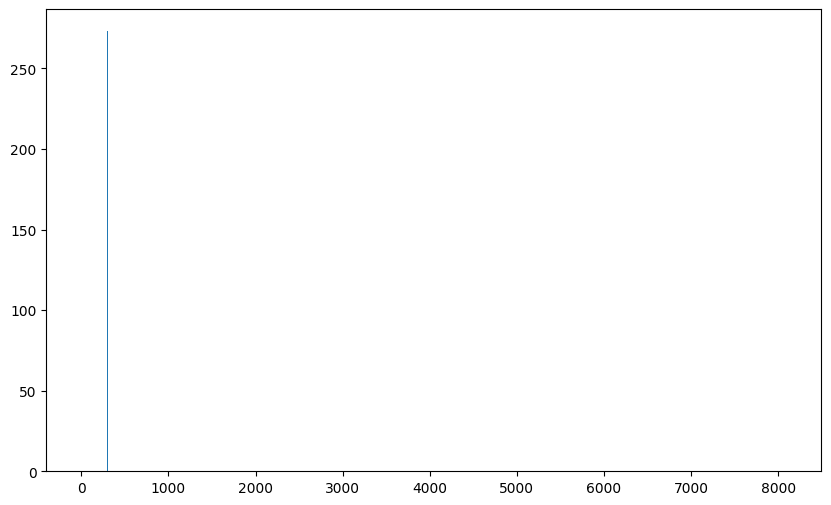

In [33]:
resizeplot(10,6,100)
plt.bar(df['Source'],df['Source'].count())
plt. show()

<Axes: xlabel='Source', ylabel='Count'>

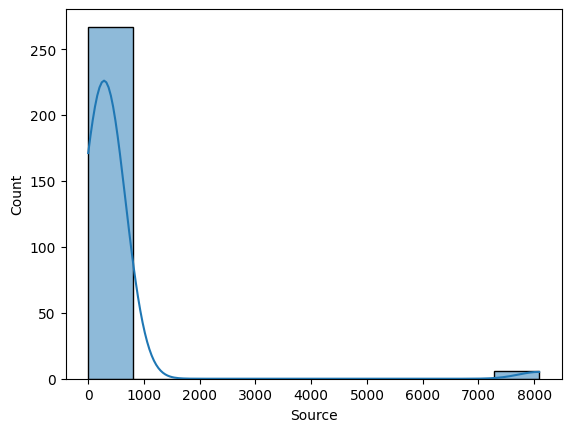

In [16]:
sns.histplot(df['Source'],kde=True)

In [17]:
x=df["Date and Time"]

In [18]:
x

Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
                          ...            
Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
Information    Microsoft Office 16 Alerts
Name: Date and Time, Length: 273, dtype: object

In [19]:
y=df["Source"]

Text(0.5, 1.0, 'Apps Used')

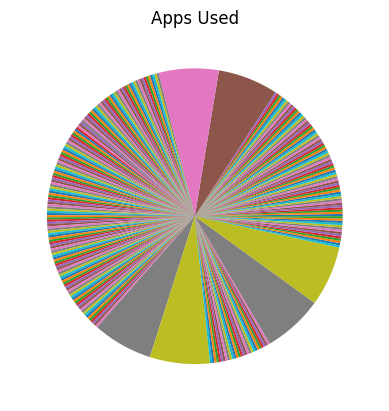

In [24]:
plt.pie(y)
plt.title("Apps Used")


<ipython-input-21-d7838ac3952c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Date and Time"]).sum().plot(kind='pie',y='Source',autopct='%1.0f%%')


<Axes: ylabel='Source'>

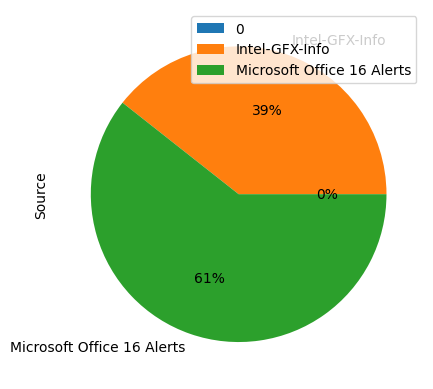

In [21]:
df.groupby(["Date and Time"]).sum().plot(kind='pie',y='Source',autopct='%1.0f%%')

<Axes: >

<Figure size 1000x600 with 0 Axes>

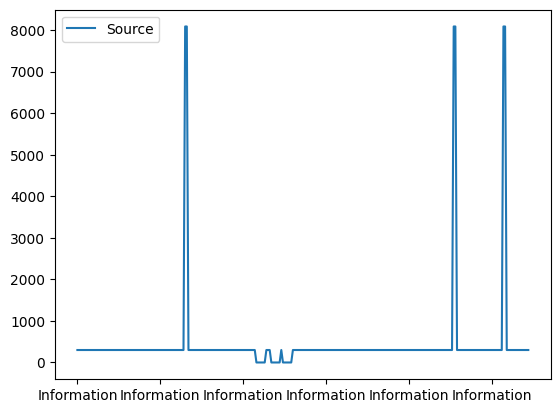

In [25]:
resizeplot(10,6,100)
df[['Source']].plot()